In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [6]:
model = VGG16(weights='imagenet', include_top=False)

In [4]:
def extract_features(image_path):
    img = image.load_img(image_path,target_size = (224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    return features.flatten()


In [10]:
import os

def extract_features_from_folder(folder_path):
    features_list = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        features = extract_features(img_path)
        features_list.append(features)

        print(f"Features for {filename}: {features}")
    return np.array(features_list)

feature_list = extract_features_from_folder('E:\\IIT Year 2\\Sem 1\\DSGP\\Images\\augmented_balcony')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Features for 0_0078cfc2-e0e6-4b31-81ff-85b64df292a4.jpeg: [ 0.        0.        0.       ...  0.       36.980507  0.      ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Features for 1000_aug_0_5918.jpg: [0. 0. 0. ... 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Features for 1001_aug_0_5919.jpg: [ 0.        0.        0.       ...  0.       13.825471  0.      ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Features for 1002_aug_0_5927.jpg: [ 0.       0.       0.      ...  0.      25.32357  0.     ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Features for 1003_aug_0_5931.jpg: [ 0.        0.        0.       ...  0.       26.320919  0.      ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Features for 1004_aug_0_5932.jpg: [ 0.      28.80215  0.      ...  0.       0.       0.     ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Features for 1005_aug_0_5933.jpg: [0.        0.        0.        ... 0.        1.8441293 0.       ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Features for 1006_

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

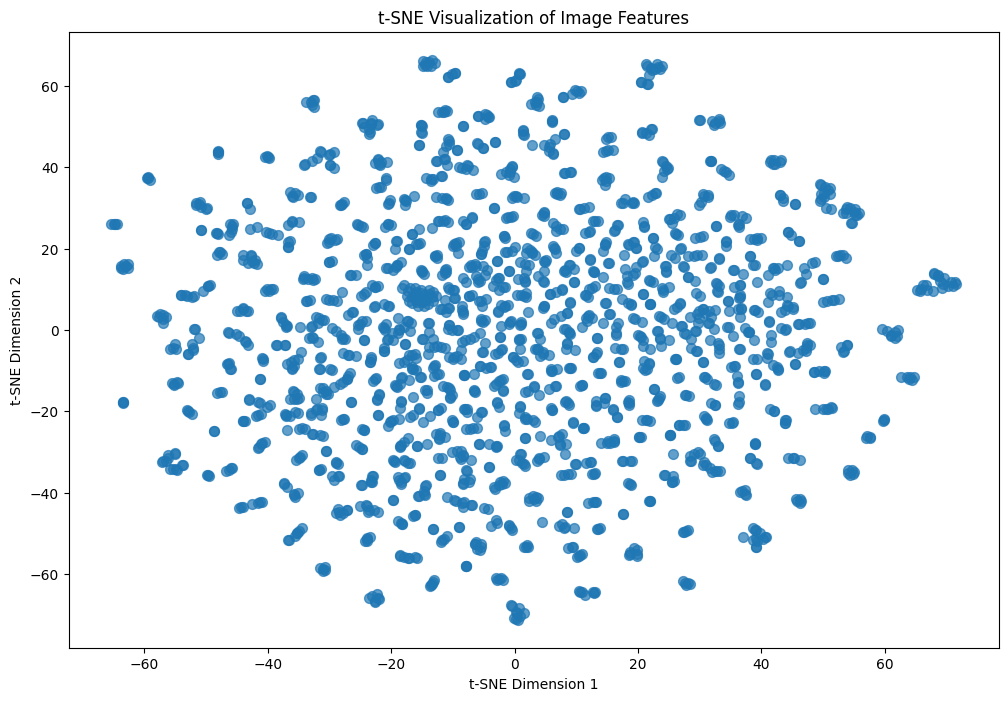

In [11]:
pca = PCA(n_components=50)
features_pca = pca.fit_transform(feature_list)

tsne = TSNE(n_components=2, random_state=0)
features_tsne = tsne.fit_transform(features_pca)
plt.figure(figsize=(12, 8))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], s=50, alpha=0.7)
plt.title("t-SNE Visualization of Image Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()
